Columns in dataset: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_open',
       'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open',
       'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open',
       'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price',
       'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open',
       'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open',
       'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
       'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High',
       'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
       'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
   

C:\Users\jaya karthick\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


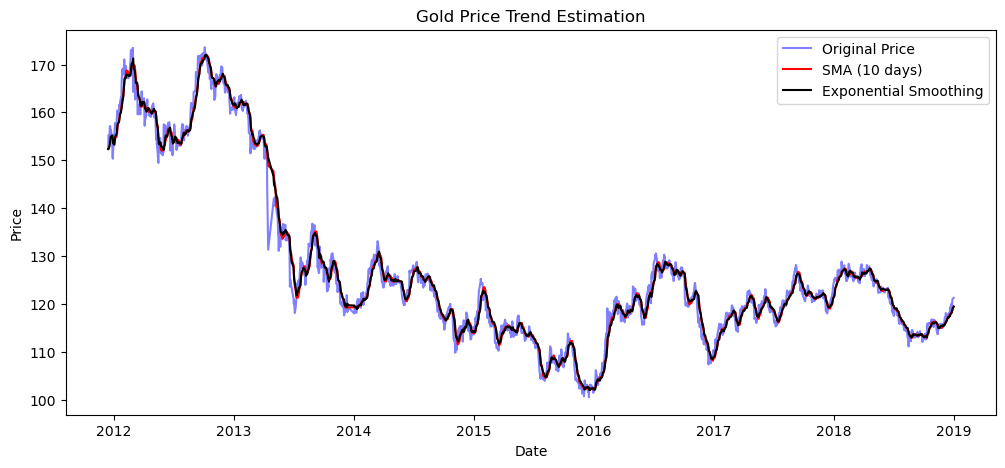

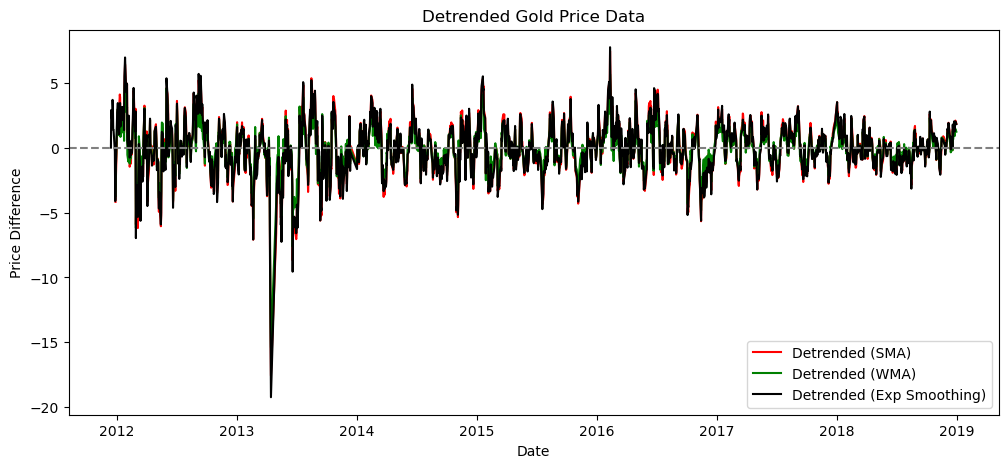

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing

file_path = r"D:\221501507\TIME SERIES ANALYSIS AND FORECASTING\EX03\archive (1) (1)\FINAL_USO.csv"  # Update path
df = pd.read_csv(file_path, parse_dates=["Date"], index_col="Date")

df.columns = df.columns.str.strip()
print("Columns in dataset:", df.columns)

if "Adj Close" not in df.columns:
    print("Error: 'Adj Close' column not found!")
    print("Available columns:", df.columns)
    exit()

target = "Adj Close"
features = [
    'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
    'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
    'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
    'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend',
    'OF_Price', 'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend',
    'OS_Price', 'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend',
    'SF_Price', 'SF_Open', 'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend',
    'USB_Price', 'USB_Open', 'USB_High', 'USB_Low', 'USB_Trend',
    'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low', 'PLT_Trend',
    'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low', 'PLD_Trend',
    'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High', 'USDI_Low', 'USDI_Volume', 'USDI_Trend',
    'GDX_Open', 'GDX_High', 'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume',
    'USO_Open', 'USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume'
]

df = df[[target] + features].dropna()

df["SMA_10"] = df[target].rolling(window=10).mean()
df["SMA_20"] = df[target].rolling(window=20).mean()

weights = np.arange(1, 11)
df["WMA_10"] = df[target].rolling(window=10).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

exp_model = SimpleExpSmoothing(df[target]).fit(smoothing_level=0.2, optimized=False)
df["Exp_Smooth"] = exp_model.fittedvalues

df["Detrended_SMA"] = df[target] - df["SMA_10"]
df["Detrended_WMA"] = df[target] - df["WMA_10"]
df["Detrended_Exp"] = df[target] - df["Exp_Smooth"]

plt.figure(figsize=(12, 5))
plt.plot(df[target], label="Original Price", color="blue", alpha=0.5)
plt.plot(df["SMA_10"], label="SMA (10 days)", color="red")
plt.plot(df["Exp_Smooth"], label="Exponential Smoothing", color="black")
plt.title("Gold Price Trend Estimation")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(df["Detrended_SMA"], label="Detrended (SMA)", color="red")
plt.plot(df["Detrended_WMA"], label="Detrended (WMA)", color="green")
plt.plot(df["Detrended_Exp"], label="Detrended (Exp Smoothing)", color="black")
plt.axhline(y=0, color='gray', linestyle='--')
plt.title("Detrended Gold Price Data")
plt.xlabel("Date")
plt.ylabel("Price Difference")
plt.legend()
plt.show()
